In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings 
warnings.filterwarnings('ignore')

Loding the data set

In [147]:
df=pd.read_csv('yellow_tripdata_2020-01.csv')

In [148]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


Expolatory data analysis

In [150]:
df.shape

(6405008, 18)

In [151]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [152]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [153]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [154]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [155]:
df['duration']=df['duration'].dt.total_seconds()/60

In [156]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [157]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [158]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [265]:
df.isnull().sum

<bound method DataFrame.sum of          passenger_count  payment_type  fare_amount  trip_distance  duration
0                  False         False        False          False     False
1                  False         False        False          False     False
2                  False         False        False          False     False
3                  False         False        False          False     False
5                  False         False        False          False     False
...                  ...           ...          ...            ...       ...
6339550            False         False        False          False     False
6339555            False         False        False          False     False
6339561            False         False        False          False     False
6339563            False         False        False          False     False
6339564            False         False        False          False     False

[2281334 rows x 5 columns]>

In [160]:
(65441/len(df))*100

1.021716132126611

In [161]:
df.dropna(inplace=True)

In [162]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [224]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Card'

In [229]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration


In [230]:
df.drop_duplicates(inplace=True)

In [232]:
df.shape

(2395698, 5)

In [235]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    5.689010e-01
2    2.010888e-01
3    7.368917e-02
5    7.149273e-02
6    4.467758e-02
4    4.014822e-02
7    1.669660e-06
8    8.348298e-07
Name: proportion, dtype: float64

In [237]:
df['passenger_count'].value_counts(normalize=True)

payment_type
Card    0.675303
Cash    0.324697
Name: proportion, dtype: float64

In [239]:
print(df.dtypes)


passenger_count      int64
payment_type        object
fare_amount        float64
trip_distance      float64
duration           float64
dtype: object


In [241]:
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0)&(df['passenger_count']<6)]


TypeError: '<' not supported between instances of 'str' and 'int'

In [243]:
df.shape

(2395698, 5)

In [245]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [247]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.395698e+06,2.395698e+06,2.395698e+06,2.395698e+06
mean,1.978286e+00,1.250378e+01,2.811082e+00,1.447723e+01
std,1.470054e+00,5.734875e+00,1.939465e+00,7.278972e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.000000e+00,1.350000e+00,8.883333e+00
50%,1.000000e+00,1.150000e+01,2.290000e+00,1.373333e+01
75%,2.000000e+00,1.600000e+01,3.760000e+00,1.926667e+01
max,8.000000e+00,3.850000e+01,8.820000e+00,3.573333e+01


In [248]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x20f4cf2ab10>,
 'caps': [<matplotlib.lines.Line2D at 0x20f4cf2b4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ec7c63b90>],
 'medians': [<matplotlib.lines.Line2D at 0x20f4cf38410>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f4cf38510>],
 'means': []}

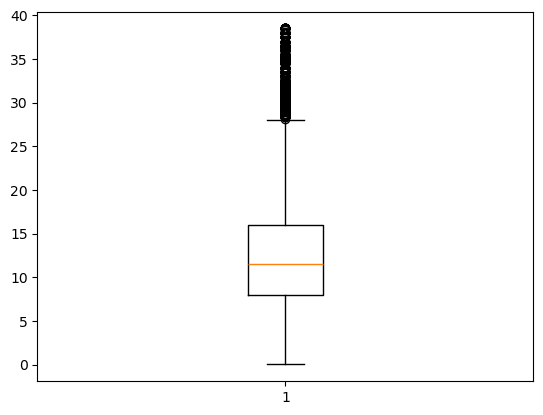

In [251]:
plt.boxplot(df['fare_amount'])

In [253]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)  # First quartile
    q3 = df[col].quantile(0.75)  # Third quartile
    IQR = q3 - q1  
    
    lower_bound = q1 - 1.5 * IQR  
    upper_bound = q3 + 1.5 * IQR  
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [254]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


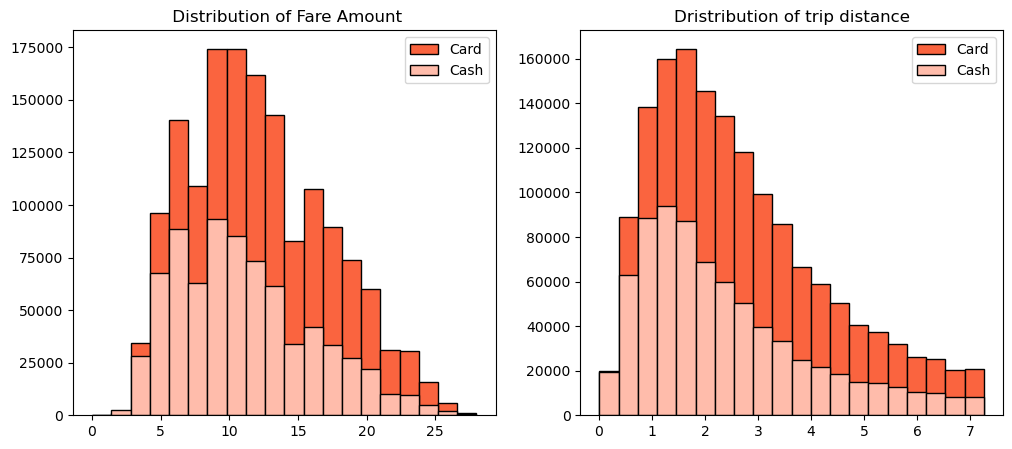

In [257]:
plt.figure(figsize=(12,5))

# Plot 1
plt.subplot(1, 2, 1)
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')

# Add a legend and title
plt.legend()
plt.title(' Distribution of Fare Amount')

plt.subplot(1, 2, 2)
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')

# Add a legend and title
plt.legend()
plt.title('Dristribution of trip distance')

# Show the plot
plt.show()


In [258]:
df.groupby('payment_type').agg({
    'fare_amount': ['mean', 'std'],
    'trip_distance': ['mean', 'std']
})


fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.217860  5.046567      2.669639  1.628132
Cash           11.098745  4.918047      2.361075  1.599142

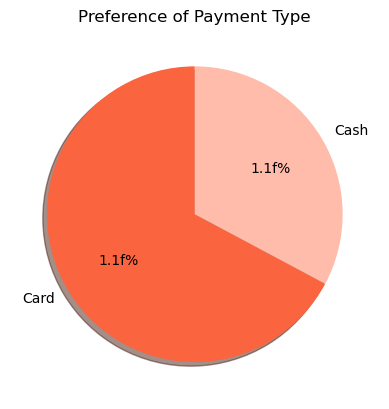

In [260]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels=df['payment_type'].value_counts().index, startangle=90, shadow=True, autopct='1.1f%%', colors=['#FA643F', '#FFBCAB'])
plt.show()

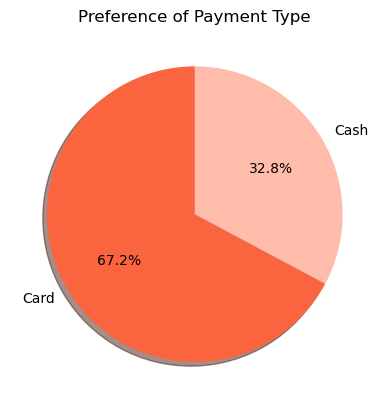

In [262]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), 
        labels=df['payment_type'].value_counts().index, 
        startangle=90, 
        shadow=True, 
        autopct='%1.1f%%',  # Corrected percentage format
        colors=['#FA643F', '#FFBCAB'])

plt.show()


In [216]:
df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         904168
             2                         326663
             3                         122139
             4                          63537
             5                         123749
             6                          77563
             7                              2
             8                              2
Cash         1                         458747
             2                         155085
             3                          54398
             4                          32646
             5                          47526
             6                          29471
             7                              2

In [132]:
df.groupby(['payment_type', 'passenger_count'])['passenger_count'].count().reset_index(name='5')

,payment_type,passenger_count,5
0,3,1,11219
1,3,2,2219
2,4,1,4523
3,4,2,1037
4,Card,1,875592
5,Card,2,320785
6,Cash,1,449373
7,Cash,2,152934


In [140]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

NameError: name 'passenger_count' is not defined

In [138]:
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100


NameError: name 'passenger_count' is not defined